# 0. Load Packages and Dataset

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_data_path

df = pd.read_csv(get_data_path("cell2celltrain.csv"))

print(f"Number of rows (instances): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")
df.head()


Number of rows (instances): 51047
Number of columns (features): 58


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# 1. Basic Data Info and Missing Values

In [5]:
# General info: non-null count, dtypes
df.info()

# Check for missing values
print("\nMissing values in columns:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# 2. Target Variable: Churn

In [6]:
print("\nChurn counts:")
print(df['Churn'].value_counts())
print("\nChurn proportions:")
print(df['Churn'].value_counts(normalize=True))


Churn counts:
Churn
No     36336
Yes    14711
Name: count, dtype: int64

Churn proportions:
Churn
No     0.711815
Yes    0.288185
Name: proportion, dtype: float64


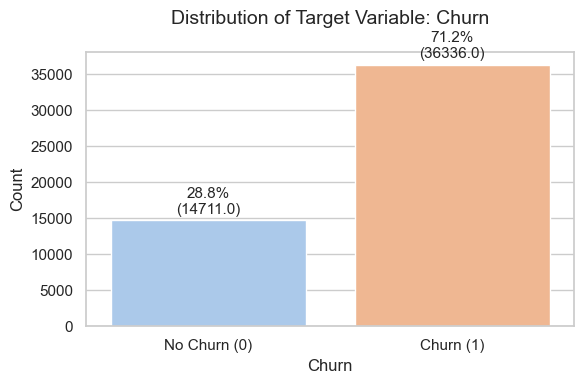

In [7]:
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='pastel', legend=False)

# Add percentage + count labels above bars
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.1f}%\n({count})',
                (p.get_x() + p.get_width() / 2., p.get_height() + total * 0.01),
                ha='center', va='bottom', fontsize=11)

# Labels and layout
plt.title("Distribution of Target Variable: Churn", fontsize=14, pad=20)  # pad = space between title and plot
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Churn (0)", "Churn (1)"])

# Adjust spacing to avoid overlap
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()



In [8]:
#Convert Target Variable for EDA
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})


In [9]:
# Descriptive statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.00,3201534.00,3305376.000,3399994.00
Churn,51047.0,2.881854e-01,0.452922,0.00,0.00,0.00,1.000,1.00
MonthlyRevenue,50891.0,5.883449e+01,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,5.256534e+02,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,4.683009e+01,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,8.952290e-01,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,4.002778e+01,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244e+00,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-1.154791e+01,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985e+00,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50


In [10]:
df['InactiveSubs'] = df['UniqueSubs'] - df['ActiveSubs']
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()


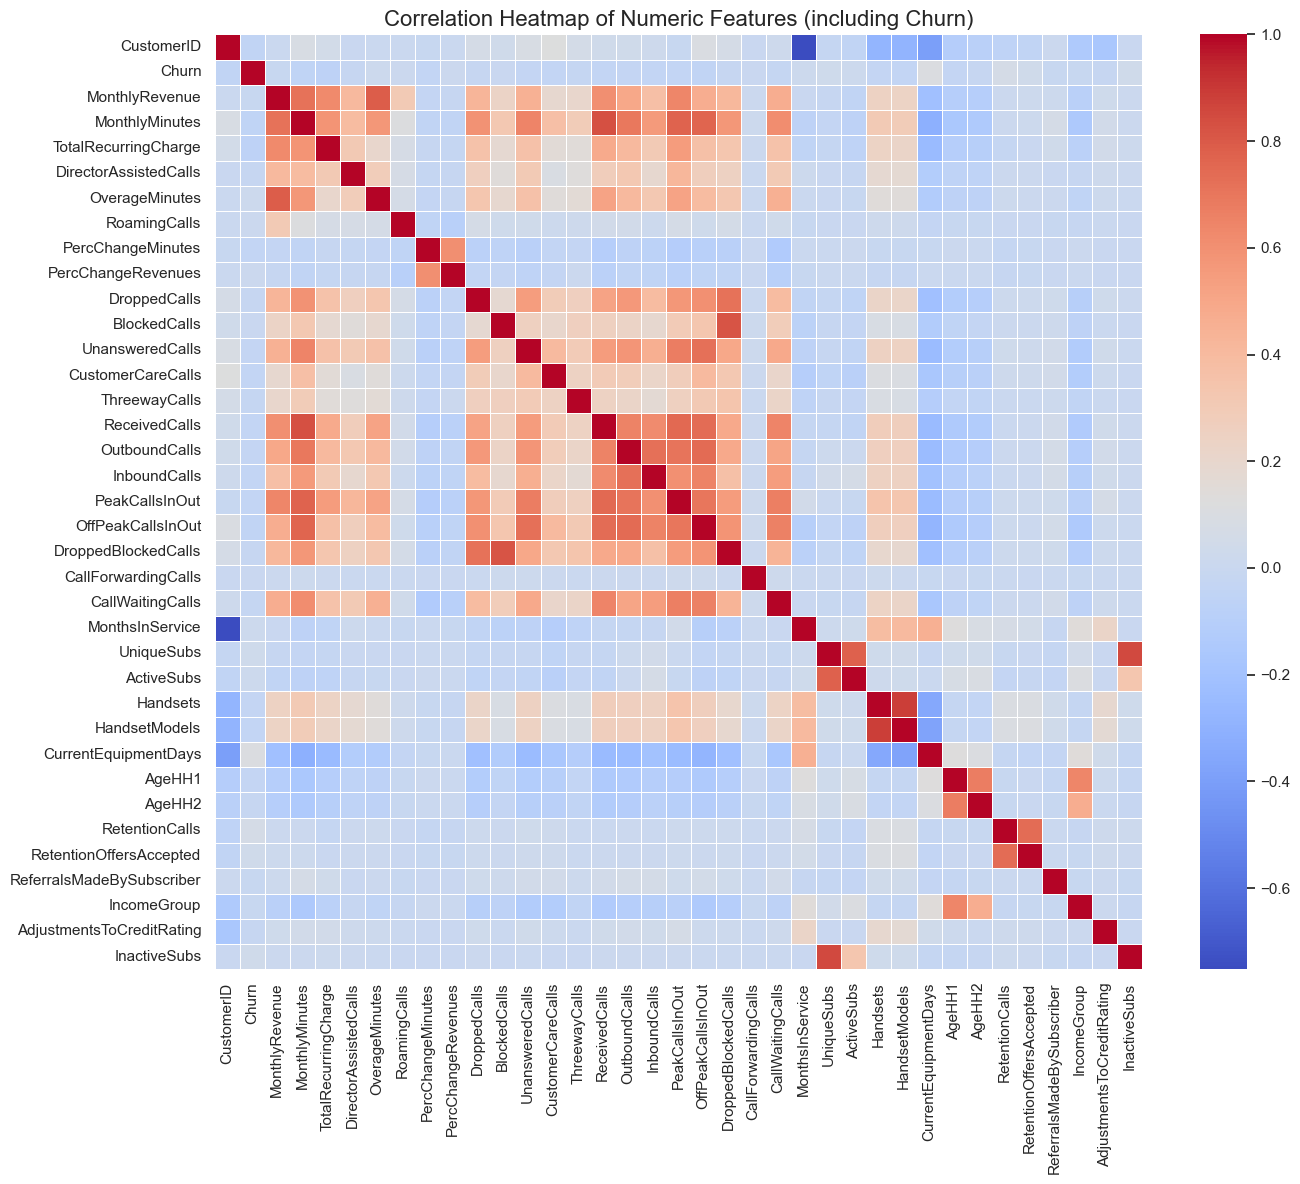

In [11]:
# Select only numeric columns including Churn_num
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (including Churn)", fontsize=16)
plt.tight_layout()
plt.show()

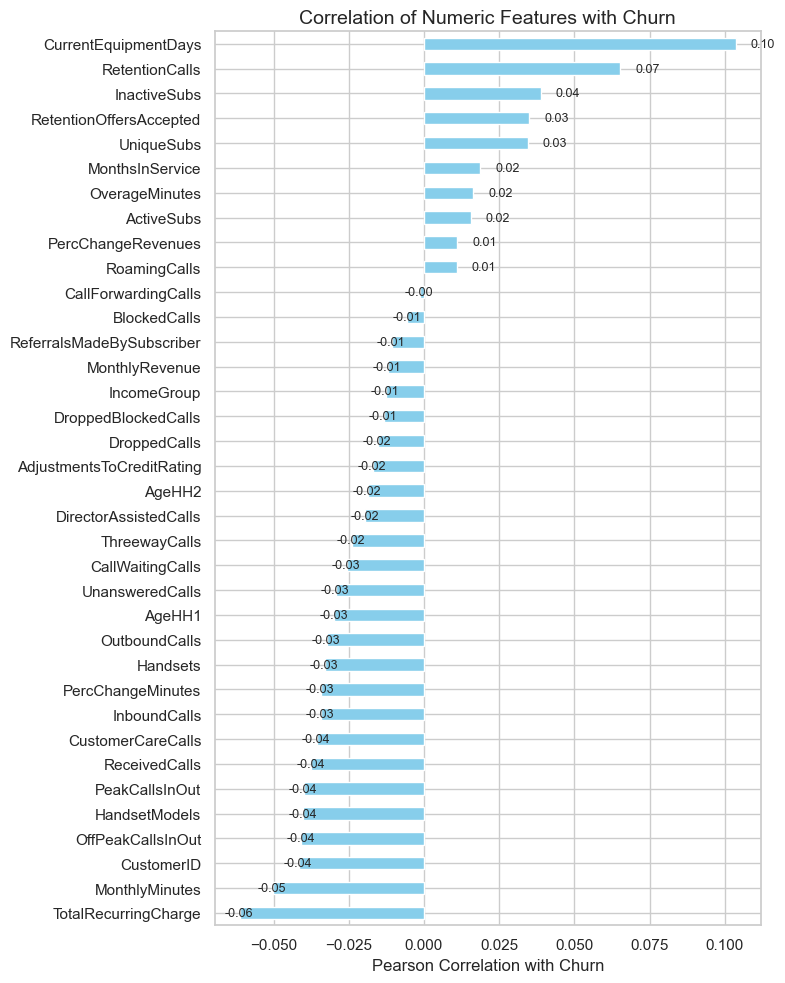

In [12]:
churn_corr = numeric_df.corr()['Churn'].drop('Churn')

plt.figure(figsize=(8, 10))
ax = churn_corr.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Add correlation values at the end of bars
for i, (feature, corr_value) in enumerate(churn_corr.sort_values(ascending=True).items()):
    ax.text(corr_value + 0.005 * np.sign(corr_value), i, f"{corr_value:.2f}", va='center', fontsize=9)

plt.title("Correlation of Numeric Features with Churn", fontsize=14)
plt.xlabel("Pearson Correlation with Churn")
plt.tight_layout()
plt.show()



In [13]:
# 檢查這些欄位是否有負數值（在原始資料 df 中）
non_negative_cols = [
    'MonthlyRevenue', 'MonthlyMinutes', 'OverageMinutes',
    'TotalRecurringCharge', 'DirectorAssistedCalls', 'RoamingCalls',
    'DroppedCalls', 'UnansweredCalls', 'CustomerCareCalls',
    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut', 'CallWaitingCalls',
    'Handsets', 'CurrentEquipmentDays', 'RetentionCalls',
    'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
    'AdjustmentsToCreditRating', 'InactiveSubs'
]

for col in non_negative_cols:
    if col in df.columns:
        num_neg = (df[col] < 0).sum()
        if num_neg > 0:
            print(f"{col} has {num_neg} negative values")
    else:
        print(f"❗ Warning: {col} not found in df.columns")


MonthlyRevenue has 3 negative values
TotalRecurringCharge has 8 negative values
CurrentEquipmentDays has 76 negative values


In [14]:
# ✅ 刪除含有負值的觀測值
cols_with_negatives = ['MonthlyRevenue', 'TotalRecurringCharge', 'CurrentEquipmentDays']

for col in cols_with_negatives:
    df = df[df[col] >= 0].copy()  # 僅保留非負值觀測，並建立新 DataFrame

# ✅ 檢查結果
print("📌 After removing negatives:")
for col in cols_with_negatives:
    print(f"{col}: {(df[col] < 0).sum()} negative values remaining")


📌 After removing negatives:
MonthlyRevenue: 0 negative values remaining
TotalRecurringCharge: 0 negative values remaining
CurrentEquipmentDays: 0 negative values remaining


In [15]:
# 更清晰地檢查所有欄位的唯一值數量與型別
uniques_df = pd.DataFrame({
    "Column": df.columns,
    "Unique Values": [df[col].nunique(dropna=False) for col in df.columns],
    "Data Type": [df[col].dtype for col in df.columns]
})

# 排序（由多到少）
uniques_df.sort_values(by="Unique Values", ascending=False, inplace=True)
uniques_df.reset_index(drop=True, inplace=True)

# 顯示前幾行
print(uniques_df)  # or just use print(uniques_df)

                       Column  Unique Values Data Type
0                  CustomerID          50805     int64
1              MonthlyRevenue          12648   float64
2               ReceivedCalls           6103   float64
3          PercChangeRevenues           2896   float64
4              MonthlyMinutes           2713   float64
5           PercChangeMinutes           2260   float64
6              PeakCallsInOut           1835   float64
7           OffPeakCallsInOut           1663   float64
8        CurrentEquipmentDays           1428   float64
9             UnansweredCalls            839   float64
10              OutboundCalls            786   float64
11                ServiceArea            748    object
12             OverageMinutes            746   float64
13               RoamingCalls            529   float64
14               InboundCalls            471   float64
15        DroppedBlockedCalls            447   float64
16               BlockedCalls            373   float64
17        

In [16]:
print(df['CreditRating'].value_counts())


CreditRating
2-High       18973
1-Highest     8451
3-Good        8380
5-Low         6437
4-Medium      5333
7-Lowest      2093
6-VeryLow     1138
Name: count, dtype: int64


In [17]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # 選出所有 numeric 欄位（float64 和 int64）
# numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df[numeric_cols], orient='h')
# plt.title("Boxplot of Numeric Features (check for outliers)", fontsize=14)
# plt.tight_layout()
# plt.show()


In [18]:
# 查看每個 ServiceArea 類別的出現次數
service_area_counts = df['ServiceArea'].value_counts(dropna=False)

# 顯示前幾項（若類別很多）
print(service_area_counts.head(10))  # 可依需要調整顯示數量

# 若想排序後以 DataFrame 呈現，也可以這樣做：
service_area_df = service_area_counts.reset_index()
service_area_df.columns = ['ServiceArea', 'Count']
print(service_area_df)

ServiceArea
NYCBRO917    1679
HOUHOU281    1508
DALDAL214    1496
NYCMAN917    1177
APCFCH703     781
DALFTW817     780
SANSAN210     721
APCSIL301     666
SANAUS512     610
SFROAK510     605
Name: count, dtype: int64
    ServiceArea  Count
0     NYCBRO917   1679
1     HOUHOU281   1508
2     DALDAL214   1496
3     NYCMAN917   1177
4     APCFCH703    781
..          ...    ...
743   OHIRAV330      1
744   KCYHES316      1
745   AIRGEO843      1
746   AIRNEW803      1
747   NCRDNN910      1

[748 rows x 2 columns]


In [19]:
# 查看 HandsetPrice visualization
print("HandsetPrice category distribution:")
print(df['HandsetPrice'].value_counts(dropna=False))


HandsetPrice category distribution:
HandsetPrice
Unknown    28914
30          7268
150         4086
130         2090
80          1938
10          1916
60          1761
200         1257
100         1226
40           247
400           46
250           19
300           13
180           10
500            8
240            6
Name: count, dtype: int64


/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/2267795558.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/2267795558.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/2267795558.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/2267795558.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

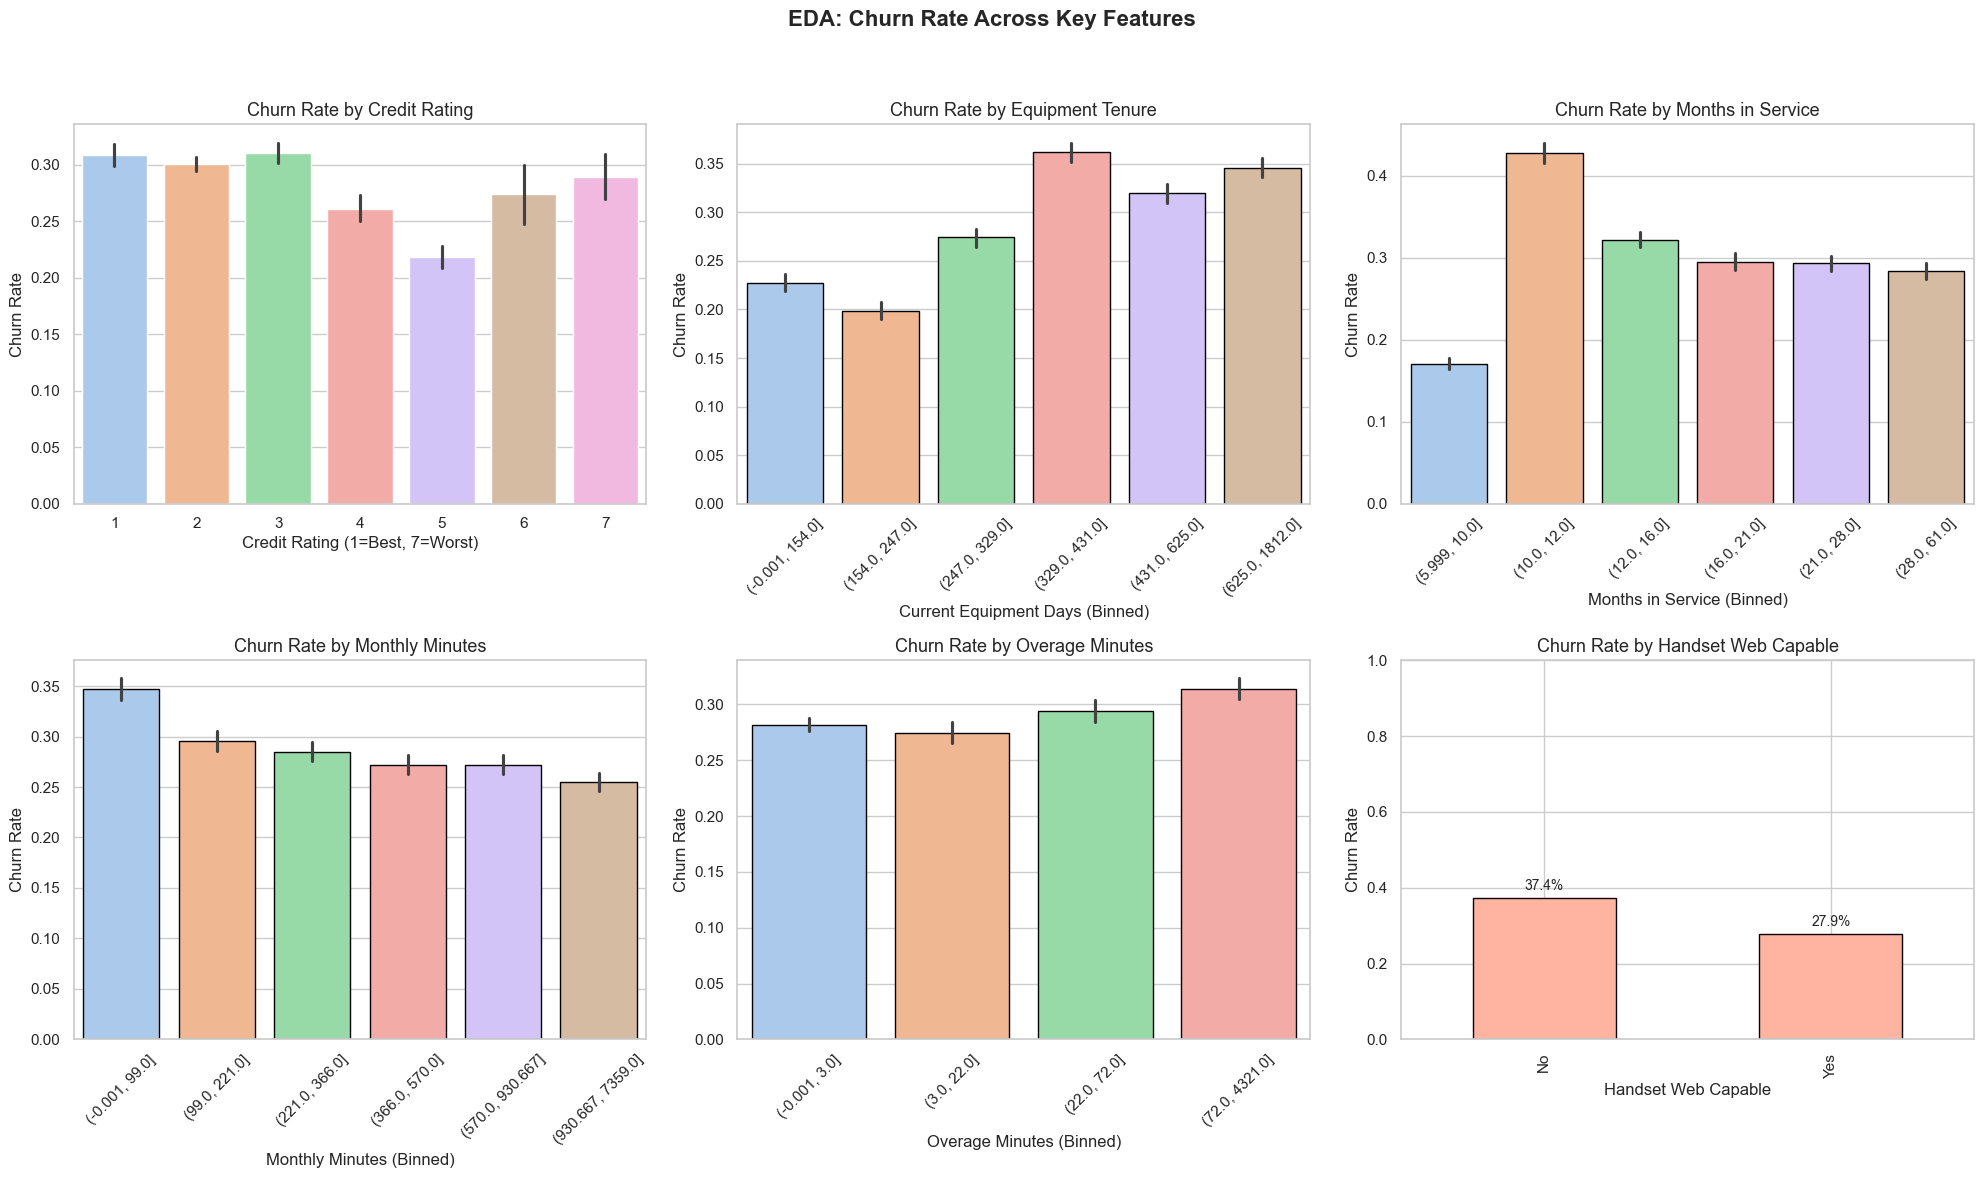

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Prepare Credit Rating mapping
credit_mapping = {
    '1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4,
    '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7
}

# 2️⃣ Create Figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# 3️⃣ Plot: Churn Rate by Credit Rating
df_credit = df[['CreditRating', 'Churn']].copy()
df_credit['CreditRatingNum'] = df_credit['CreditRating'].map(credit_mapping)
sns.barplot(
    x='CreditRatingNum',
    y='Churn',
    data=df_credit,
    palette='pastel',
    ax=axes[0]
)
axes[0].set_title("Churn Rate by Credit Rating", fontsize=13)
axes[0].set_xlabel("Credit Rating (1=Best, 7=Worst)")
axes[0].set_ylabel("Churn Rate")

# 4️⃣ Plot: Binned CurrentEquipmentDays
df_binned = df.copy()
df_binned['CurrentEquipmentDays_bin'] = pd.qcut(df_binned['CurrentEquipmentDays'], q=6, duplicates="drop")
sns.barplot(
    x='CurrentEquipmentDays_bin',
    y='Churn',
    data=df_binned,
    palette='pastel',
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title("Churn Rate by Equipment Tenure", fontsize=13)
axes[1].set_xlabel("Current Equipment Days (Binned)")
axes[1].set_ylabel("Churn Rate")
axes[1].tick_params(axis='x', rotation=45)

# 5️⃣ Plot: Binned MonthsInService
df_binned['MonthsInService_bin'] = pd.qcut(df_binned['MonthsInService'], q=6, duplicates="drop")
sns.barplot(
    x='MonthsInService_bin',
    y='Churn',
    data=df_binned,
    palette='pastel',
    edgecolor='black',
    ax=axes[2]
)
axes[2].set_title("Churn Rate by Months in Service", fontsize=13)
axes[2].set_xlabel("Months in Service (Binned)")
axes[2].set_ylabel("Churn Rate")
axes[2].tick_params(axis='x', rotation=45)

# 6️⃣ Plot: Binned MonthlyMinutes
df_binned['MonthlyMinutes_bin'] = pd.qcut(df_binned['MonthlyMinutes'], q=6, duplicates="drop")
sns.barplot(
    x='MonthlyMinutes_bin',
    y='Churn',
    data=df_binned,
    palette='pastel',
    edgecolor='black',
    ax=axes[3]
)
axes[3].set_title("Churn Rate by Monthly Minutes", fontsize=13)
axes[3].set_xlabel("Monthly Minutes (Binned)")
axes[3].set_ylabel("Churn Rate")
axes[3].tick_params(axis='x', rotation=45)

# 7️⃣ Plot: Binned OverageMinutes
df_binned['OverageMinutes_bin'] = pd.qcut(df_binned['OverageMinutes'], q=6, duplicates="drop")
sns.barplot(
    x='OverageMinutes_bin',
    y='Churn',
    data=df_binned,
    palette='pastel',
    edgecolor='black',
    ax=axes[4]
)
axes[4].set_title("Churn Rate by Overage Minutes", fontsize=13)
axes[4].set_xlabel("Overage Minutes (Binned)")
axes[4].set_ylabel("Churn Rate")
axes[4].tick_params(axis='x', rotation=45)

# 8️⃣ Plot: Churn Rate by HandsetWebCapable
prop_web = df.groupby('HandsetWebCapable')['Churn'].value_counts(normalize=True).unstack().fillna(0)
prop_web[1].plot(
    kind='bar',
    color='#FFB4A2',
    edgecolor='black',
    ax=axes[5]
)
axes[5].set_title("Churn Rate by Handset Web Capable", fontsize=13)
axes[5].set_xlabel("Handset Web Capable")
axes[5].set_ylabel("Churn Rate")
axes[5].set_ylim(0, 1)
for idx, val in enumerate(prop_web.index):
    axes[5].text(idx, prop_web.loc[val, 1] + 0.02, f"{prop_web.loc[val, 1]:.1%}", ha='center', fontsize=10)

# 9️⃣ Layout adjustment
plt.suptitle("EDA: Churn Rate Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Appendix Visualizations

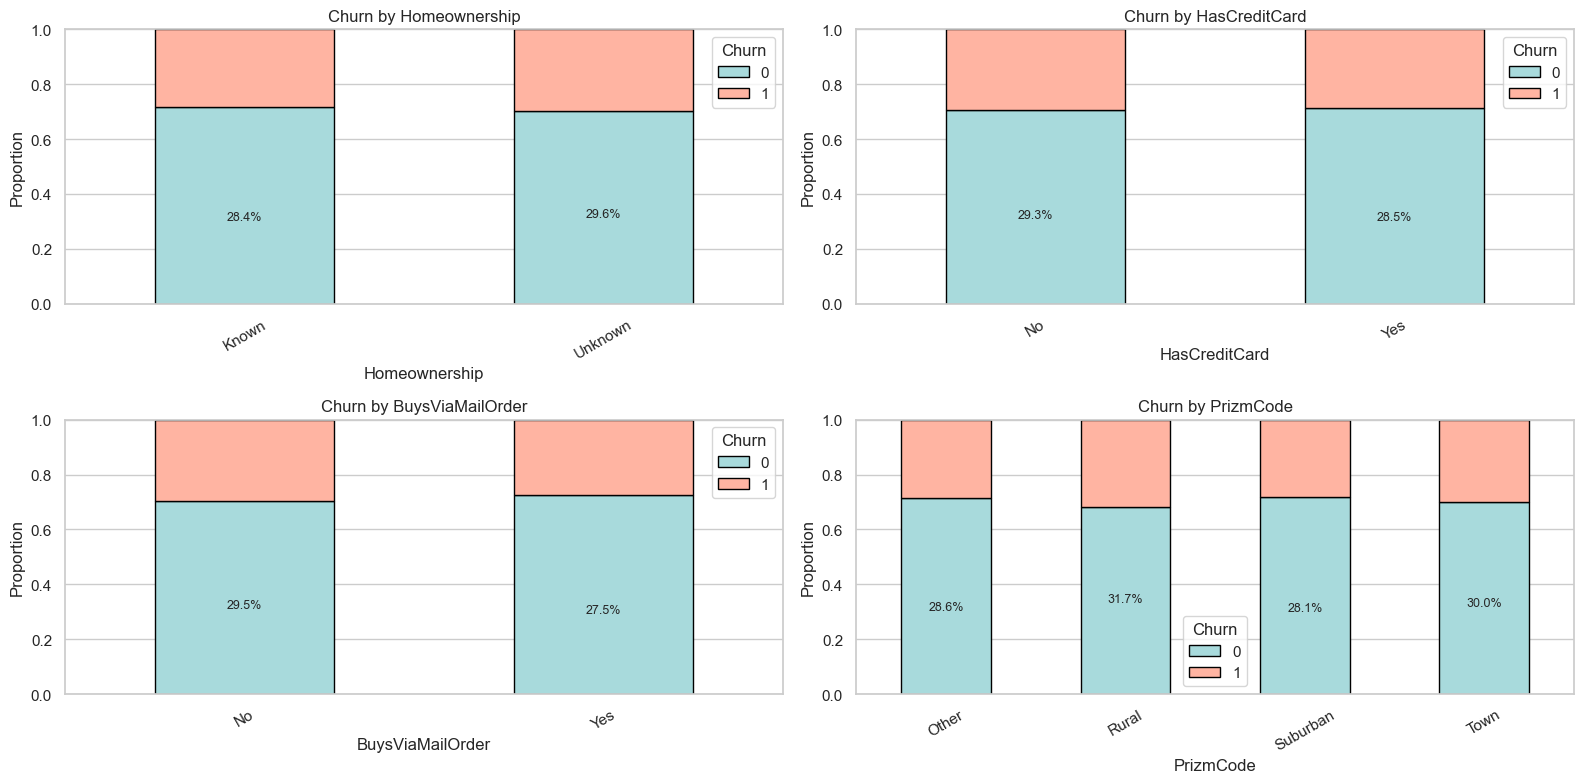

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


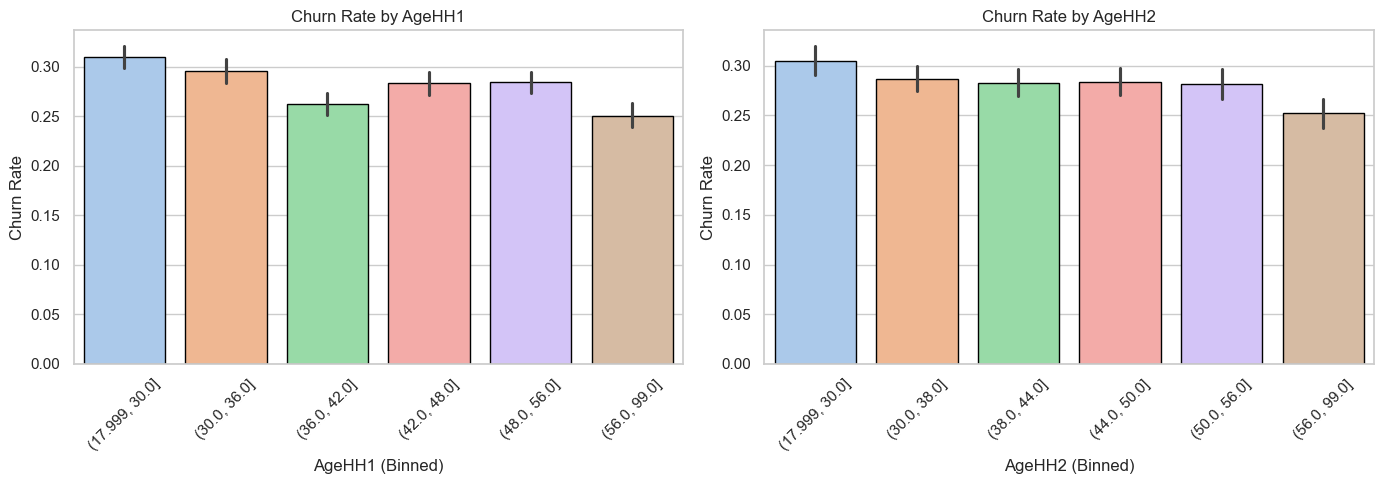

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


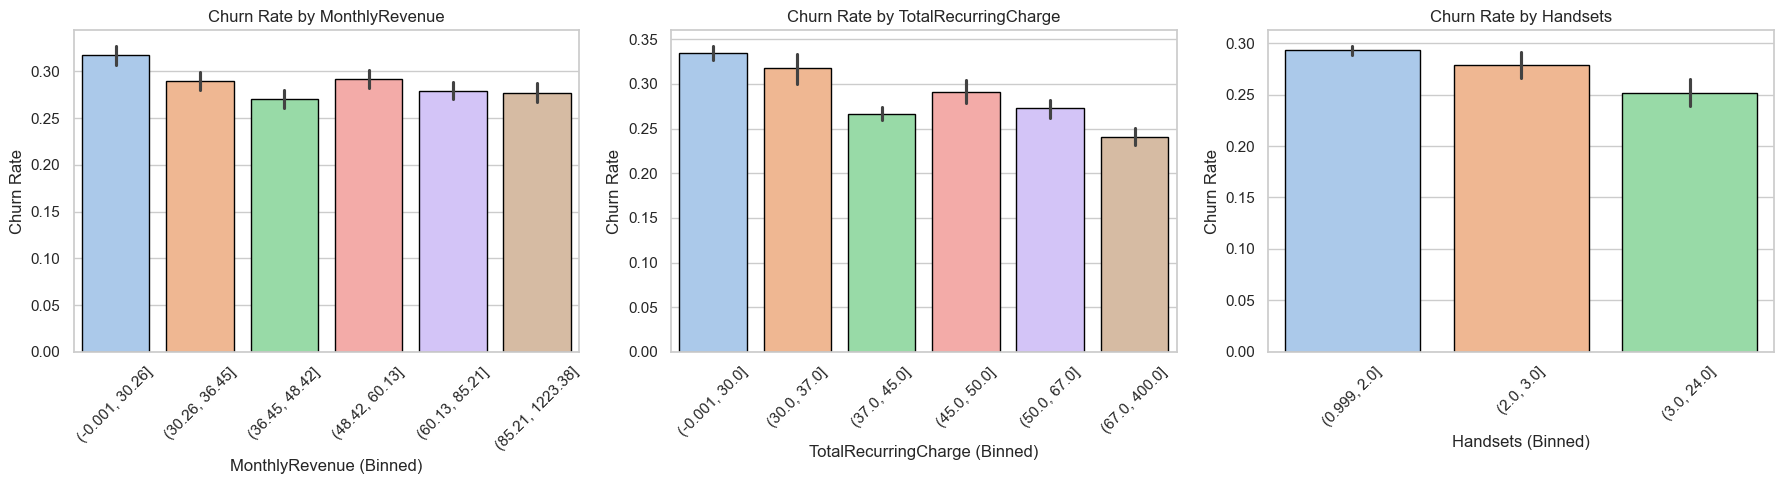

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


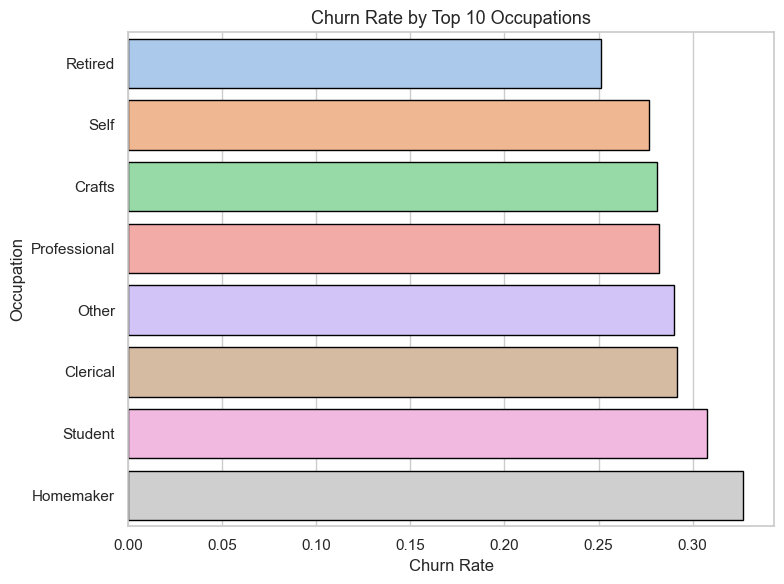

/var/folders/3c/9jjrrtl10wq2cpl6rtgdl13w0000gn/T/ipykernel_92854/958934992.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


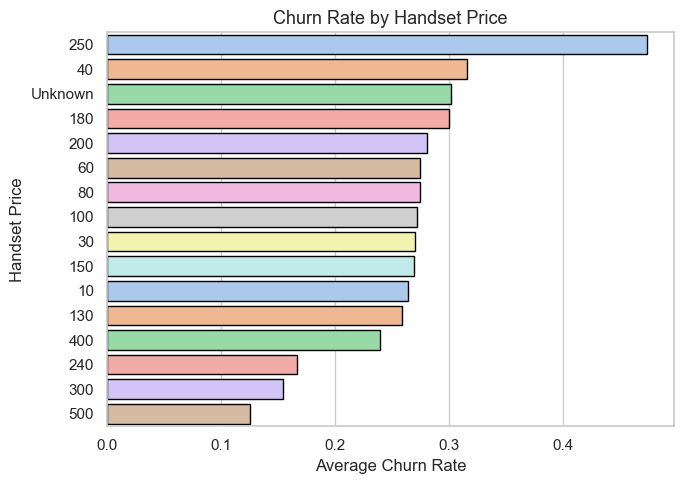

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Proportional stacked bar plots for categorical features EXCLUDING HandsetWebCapable
categorical_cols = [
    'Homeownership',
    'HasCreditCard',
    'BuysViaMailOrder',
    'PrizmCode'
]

plt.figure(figsize=(16, 8))
for i, col in enumerate(categorical_cols, 1):
    prop_df = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    plt.subplot(2, 2, i)
    prop_df[[0, 1]].plot(
        kind='bar',
        stacked=True,
        ax=plt.gca(),
        color=['#A8DADC', '#FFB4A2'],
        edgecolor='black'
    )
    plt.title(f"Churn by {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    for idx, val in enumerate(prop_df.index):
        churn_rate = prop_df.loc[val, 1]
        plt.text(idx, churn_rate + 0.02, f"{churn_rate:.1%}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2️⃣ Binned bar plots: AgeHH1, AgeHH2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# AgeHH1
df_age = df[df['AgeHH1'] != 0].copy()
df_age['AgeHH1_bin'] = pd.qcut(df_age['AgeHH1'], q=6, duplicates='drop')
sns.barplot(
    x='AgeHH1_bin',
    y='Churn',
    data=df_age,
    palette='pastel',
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title("Churn Rate by AgeHH1", fontsize=12)
axes[0].set_xlabel("AgeHH1 (Binned)")
axes[0].set_ylabel("Churn Rate")
axes[0].tick_params(axis='x', rotation=45)

# AgeHH2
df_age2 = df[df['AgeHH2'] != 0].copy()
df_age2['AgeHH2_bin'] = pd.qcut(df_age2['AgeHH2'], q=6, duplicates='drop')
sns.barplot(
    x='AgeHH2_bin',
    y='Churn',
    data=df_age2,
    palette='pastel',
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title("Churn Rate by AgeHH2", fontsize=12)
axes[1].set_xlabel("AgeHH2 (Binned)")
axes[1].set_ylabel("Churn Rate")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3️⃣ Binned bar plots for usage-related numeric features
usage_cols = [
    'MonthlyRevenue',
    'TotalRecurringCharge',
    'Handsets'
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, col in enumerate(usage_cols):
    df_tmp = df.copy()
    df_tmp[f'{col}_bin'] = pd.qcut(df_tmp[col], q=6, duplicates='drop')
    sns.barplot(
        x=f'{col}_bin',
        y='Churn',
        data=df_tmp,
        palette='pastel',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Churn Rate by {col}", fontsize=12)
    axes[i].set_xlabel(f"{col} (Binned)")
    axes[i].set_ylabel("Churn Rate")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4️⃣ Occupation churn rate barplot
top_occup = df['Occupation'].value_counts().nlargest(10).index
top_df = df[df['Occupation'].isin(top_occup)]
churn_rate = top_df.groupby('Occupation')['Churn'].mean().sort_values()
churn_df = churn_rate.reset_index()
churn_df.columns = ['Occupation', 'ChurnRate']

plt.figure(figsize=(8, 6))
sns.barplot(
    data=churn_df,
    y='Occupation',
    x='ChurnRate',
    palette='pastel',
    edgecolor='black'
)
plt.title("Churn Rate by Top 10 Occupations", fontsize=13)
plt.xlabel("Churn Rate")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

# 5️⃣ HandsetPrice churn rate barplot
churn_rate_handset = df.groupby('HandsetPrice')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(
    x=churn_rate_handset.values,
    y=churn_rate_handset.index,
    palette='pastel',
    edgecolor='black'
)
plt.title("Churn Rate by Handset Price", fontsize=13)
plt.xlabel("Average Churn Rate")
plt.ylabel("Handset Price")
plt.tight_layout()
plt.show()



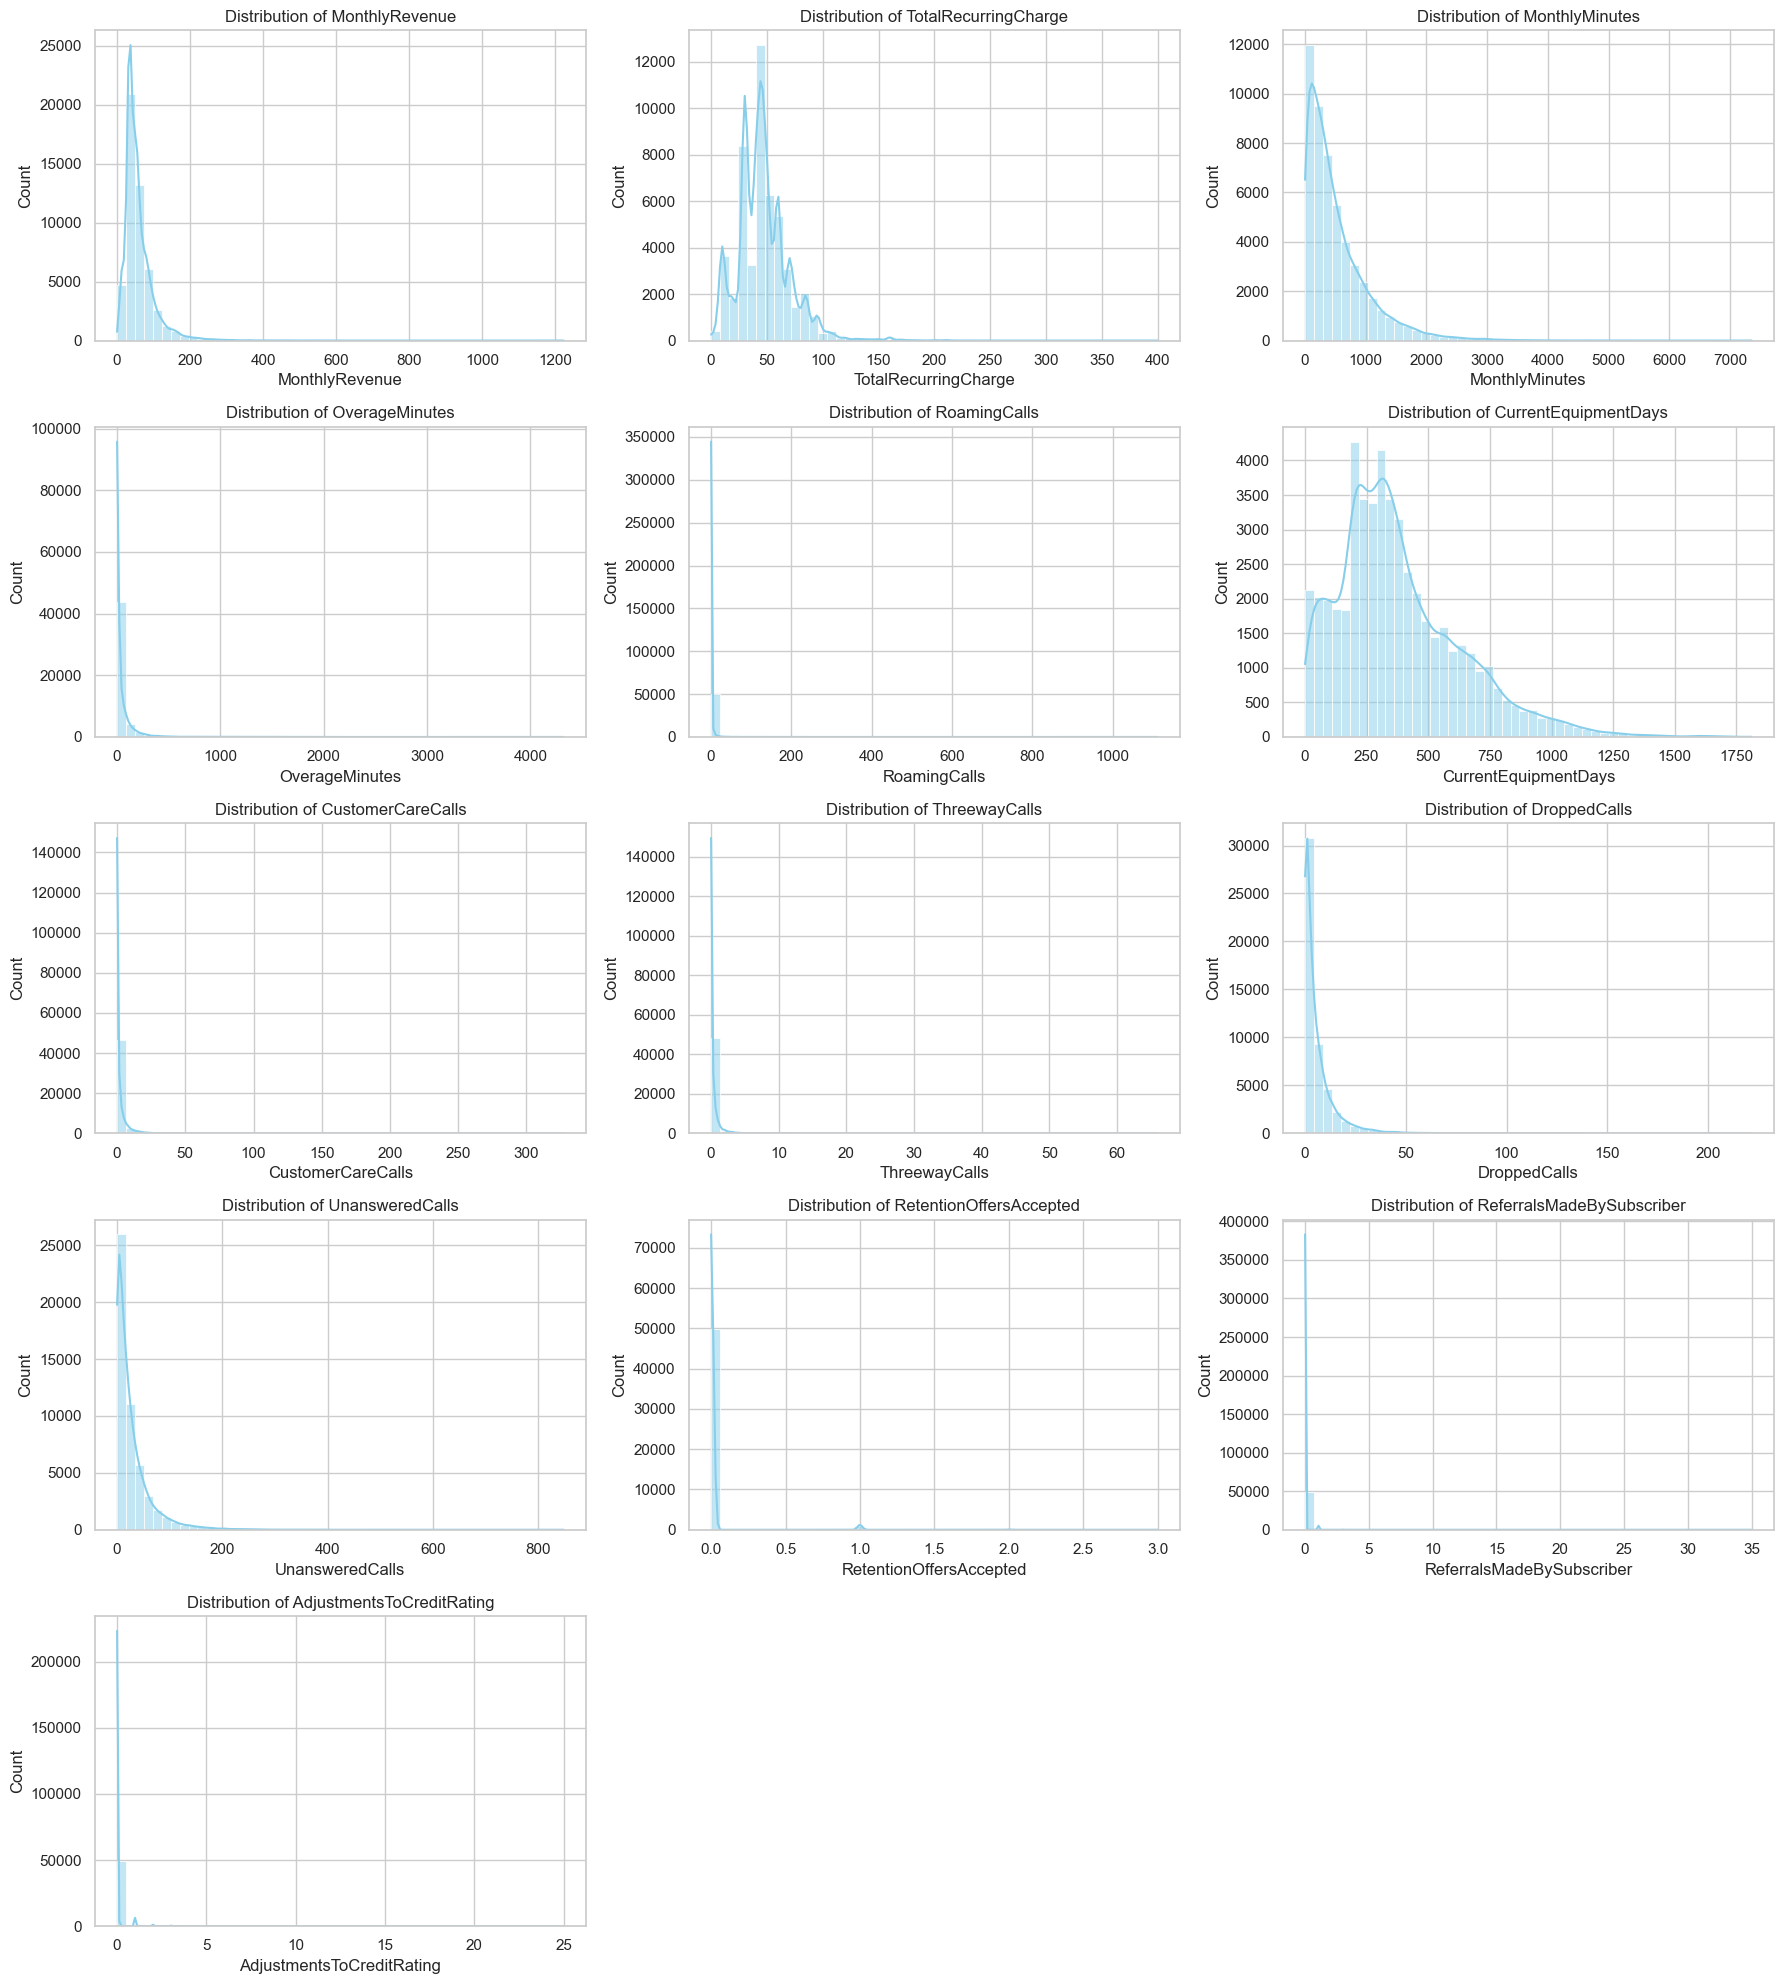

In [22]:
#Distribution of Numeric Features (Right-Tail Detection)

# 選擇要觀察分布的數值型欄位
numeric_cols = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'MonthlyMinutes',
    'OverageMinutes', 'RoamingCalls', 'CurrentEquipmentDays',
    'CustomerCareCalls', 'ThreewayCalls', 'DroppedCalls',
    'UnansweredCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber',
    'AdjustmentsToCreditRating'
]

# 建立子圖
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))

# 繪圖
for i, col in enumerate(numeric_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(df[col].dropna(), bins=50, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# 清除多餘子圖（若欄位數不是整除）
for j in range(len(numeric_cols), n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()
